In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")

fake["label"] = 0
real["label"] = 1

data = pd.concat([fake, real], axis=0)
data = data.sample(frac=1).reset_index(drop=True)

In [3]:
# Combine title and text
data["content"] = data["title"] + " " + data["text"]

# Drop unnecessary columns
data = data[["content", "label"]]
data.dropna(inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data["content"], data["label"], test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [4]:
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)
y_pred_lr = lr.predict(X_test_vec)

print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4711
           1       0.98      0.99      0.99      4269

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [5]:
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)
y_pred_rf = rf.predict(X_test_vec)

print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4711
           1       0.99      0.99      0.99      4269

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



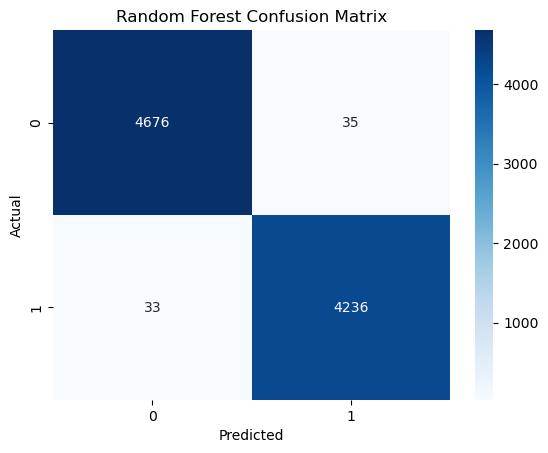

In [6]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()